Rami, Nicola Srour (2025)

title: Online retailer dataset, Logisitic regerssion

In [ ]:
# import needed libraries
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("Online Retail.xlsx")
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# remove irrelevant columns
df = df.drop(['InvoiceNo', 'StockCode', 'CustomerID'], axis=1)
# remove duplicates
df = df.drop_duplicates()
# remove null  values
df = df.dropna()
df.head(2)

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom


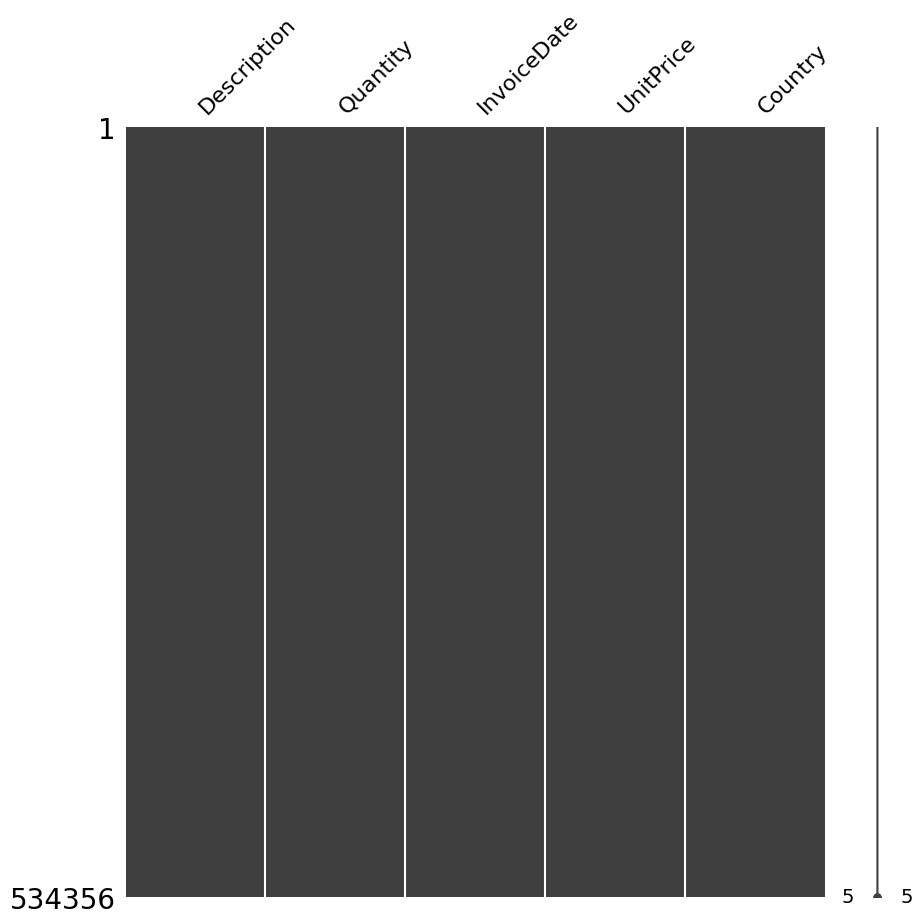

In [ ]:
# make sure no null values remain


import missingno as msno
msno.matrix(df, figsize=(10, 10))
plt.show()

In [ ]:
# see the statistics in the numerical columns in the dataset
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,534356.000000,534356,534356.000000
mean,9.702429,2011-07-04 13:57:02.265231360,4.644569
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:49:00,1.250000
50%,3.000000,2011-07-20 10:08:00,2.080000
75%,10.000000,2011-10-19 10:31:15,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.825292,NaN,97.440329


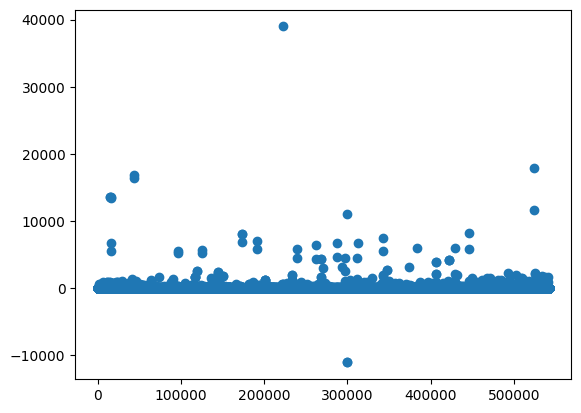

In [ ]:
# use scatter plot to remove outliers
plt.scatter(df.index, df['UnitPrice'])
plt.show()

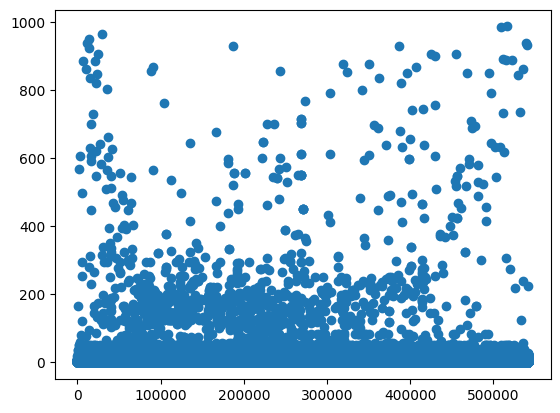

In [ ]:
df = df[df['UnitPrice'] < 1000]
df = df[df['UnitPrice'] > -3000]
plt.scatter(df.index, df['UnitPrice'])
plt.show()

In [ ]:
# findning unique values in each column with cateogrical values to know which encoding method to use
uniqueDescription = df['Description'].nunique()
uniqueCountry = df['Country'].nunique()
print(uniqueDescription, uniqueCountry)

4222 38


In [ ]:
# turn date column to date type data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# use label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Country'] = encoder.fit_transform(df['Country'])
df['InvoiceDate'] = encoder.fit_transform(df['InvoiceDate'])
df.head(3)

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,0,2.55,36
1,WHITE METAL LANTERN,6,0,3.39,36
2,CREAM CUPID HEARTS COAT HANGER,8,0,2.75,36


In [ ]:
# use tfidf vectorizer to encode desription column later
# turn description column to string at first to use tfidifvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
df['Description'] = df['Description'].astype(str)
v = TfidfVectorizer(max_features=10)
tfidfmatrxi = v.fit_transform(df['Description']).toarray()

In [ ]:
df['Description'] = tfidfmatrxi.tolist()
df.head(3)

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6,0,2.55,36
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6,0,3.39,36
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8,0,2.75,36


In [ ]:
# use category encoder and later use it on the description column
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
enc = ce.BinaryEncoder(cols=['Description'])

In [ ]:
df['Description'] = df['Description'].astype(str)
df = enc.fit_transform(df)

In [ ]:
# merge the columns i got from Binary Encoder, as it make the dataset more simple
c = ['Description_0', 'Description_1', 'Description_2', 'Description_3', 'Description_4', 'Description_5', 'Description_6']
df['Description'] = df[c].astype(str).agg(''.join, axis=1)
df = df.drop(['Description_0', 'Description_1', 'Description_2', 'Description_3', 'Description_4', 'Description_5', 'Description_6'], axis=1)
df.head(3)

,Quantity,InvoiceDate,UnitPrice,Country,Description
0,6,0,2.55,36,0000001
1,6,0,3.39,36,0000010
2,8,0,2.75,36,0000010


In [ ]:
# see types of columns
df.dtypes

,0
Quantity,int64
InvoiceDate,int64
UnitPrice,float64
Country,int64
Description,object


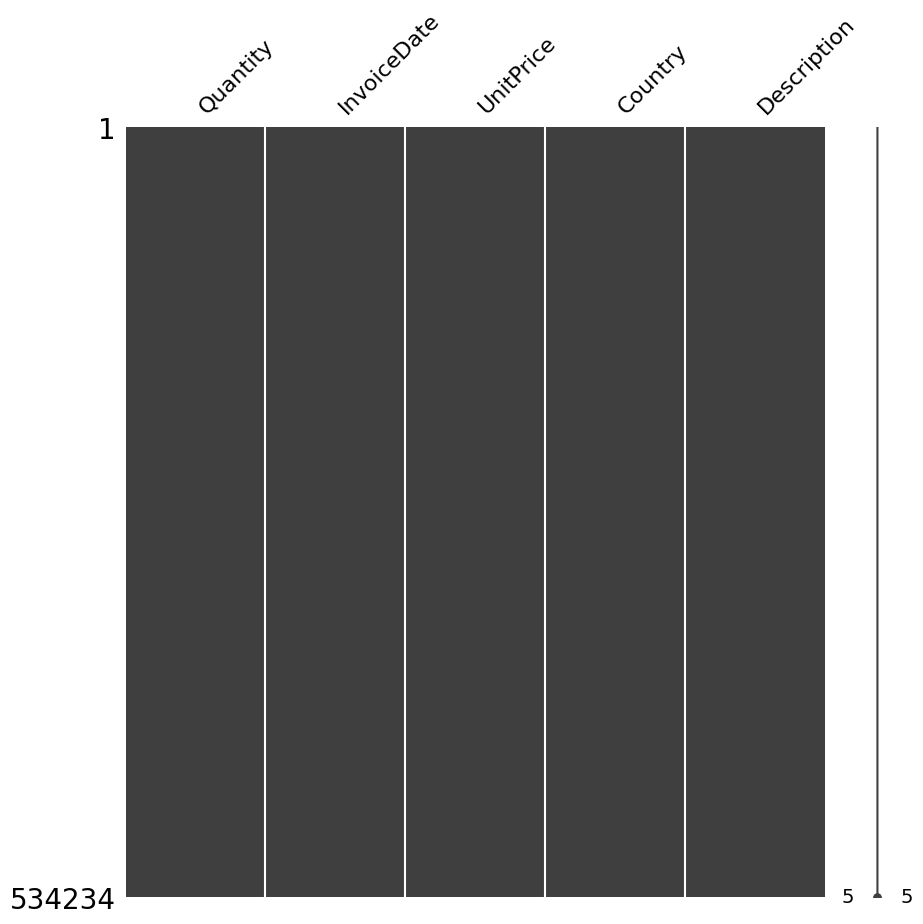

In [ ]:
# make sure again no null values exist
import missingno as msno
msno.matrix(df, figsize=(10, 10))
plt.show()

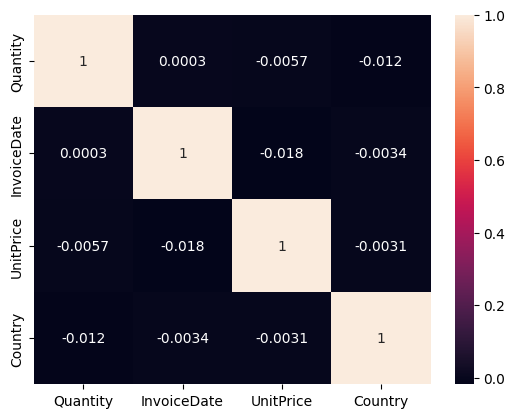

In [ ]:
# find correlation matrix

corrmatrix =  df.select_dtypes(include=['number']).corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [ ]:
x = df.drop(['Country'], axis=1)
y = df['Country']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)
print("df:", df.shape)
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

df: (534234, 5)
x_train: (400675, 4)
y_train: (400675,)
x_test: (133559, 4)
y_test: (133559,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = sklearn.linear_model.LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9128325309413817


In [ ]:
ypredprob = model.predict_proba(x_test)
roc = sklearn.metrics.roc_auc_score(y_test,ypredprob, multi_class='ovo')
roc2 = sklearn.metrics.roc_auc_score(y_test,ypredprob, multi_class='ovr')
print(roc, roc2)

0.5009439876243772 0.5462046334740162


Reference:
Chen, D. (2015), Online Retail, UCI Machine Learning Repository, Available at: https://doi.org/10.24432/C5BW33, (Accessed: 04/04/2025)